In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('datasets/backloggd_games.csv', index_col= 0)

### Remove unecessary columns and rows for this analysis 
Data corresponding with users willingness to play or will play is not used for this project. Finite information such as number of users played and ratings are used instead. <br>
**TBD** for the release will be removed since they are not out yet to be looked at. 

In [2]:
df.columns

### Solution: Drop the columns not needed via Pandas
df.drop(['Wishlist', 'Backlogs','Playing', 'Lists', 'Summary'], axis = 1, inplace= True)
### Solution: Drop all the release date categories as TBD
df.drop(df[df['Release_Date'] == 'TBD'].index, inplace= True)

df.Release_Date = df.Release_Date.apply(lambda x: int(x[-4:]))

df.drop(df[df.Release_Date > 2023].index, inplace= True)
df.drop(df[df.Release_Date < 1990].index, inplace= True)
df.drop(df[df.Rating.isna()].index, inplace= True)


### Looking for dups based off different cases. 
1. Actual Dups
2. Verison Differences
3. Remakes/Rereleases

In [3]:
print('Number of true duplicates before: {}'.format(len(df[df.duplicated()])))

### Solution: drop duplicates via Pandas
df.drop_duplicates(inplace= True)   

print('Number of true duplicates after: {}'.format(len(df[df.duplicated()])))

Number of true duplicates before: 4771
Number of true duplicates after: 0


### Format the data types to make it eaiers to compare and look
1. Convert the K in Plays
2. Convert the K in Reviews

In [4]:
df.info()

### Solution: Apply function to convert the K in the columns 
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000
    return 0.0
    
df['Plays'] = df['Plays'].apply(value_to_float)
df['Reviews'] = df['Reviews'].apply(value_to_float)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19041 entries, 0 to 59996
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         19041 non-null  object 
 1   Release_Date  19041 non-null  int64  
 2   Developers    19041 non-null  object 
 3   Platforms     19041 non-null  object 
 4   Genres        19041 non-null  object 
 5   Rating        19041 non-null  float64
 6   Plays         19041 non-null  object 
 7   Reviews       19041 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ MB


## Fill Missing Values with the correct or acceptable values
1. Rating is 0 
2. Play is 0
3. Review is 0 

This is assuming that not enough people are not in the dataset meaning that it is poor performing or not in consideration to be game of the year.

In [5]:
display(df.isna().sum())
### Solution: Use panda to fill all missing values with 0 
df[['Plays', 'Reviews', 'Rating']] = df[['Plays', 'Reviews', 'Rating']].fillna(-1, axis= 1)

Title           0
Release_Date    0
Developers      0
Platforms       0
Genres          0
Rating          0
Plays           0
Reviews         0
dtype: int64

## Distributions
Checks out the data distritution 
Rating appears to be a normal distribution. The missing ratings are not included. Most games have multiple developers and have a combination of them. 
Many of the 

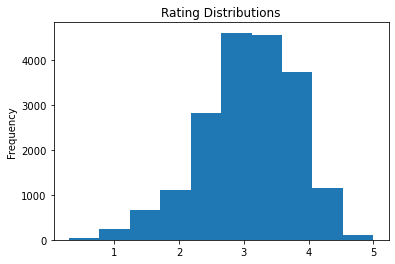

In [6]:
### Rating Distrbution 
df[df.Rating >= 0].Rating.plot(kind = 'hist', title = 'Rating Distributions', xlabel = 'Rating', sharex = False);


In [7]:
all_developers = df.Developers.values
split_devs = {}
for group in all_developers:
    new_list = group.strip('\'[ ]').split('\', \'')

    for element in new_list:
        key = element
        if key == '':
            key = 'NG'
        if split_devs.get(key) == None:
            split_devs[key] = 1 
        else:
            split_devs[key] += 1

sort_dict = dict(sorted(split_devs.items(), key = lambda x: x[1], reverse= True))
counter = 0
for key in sort_dict:
    if sort_dict[key] == 1:
        counter += 1
        


In [8]:
print('''{} % of the developers created only one game. 
This lowers the chances that these games would have multiple games of the year for different years due to numbers'''.format(round(counter/sum(sort_dict.values())*100,2)))
print('''{} % video games do not have a Developer listed which indicate that they are too new or don't have a name for the game yet.
Most likely classified as Indie Games. '''.format(round(sort_dict['NG']/sum(sort_dict.values())*100,2)))

16.27 % of the developers created only one game. 
This lowers the chances that these games would have multiple games of the year for different years due to numbers
6.5 % video games do not have a Developer listed which indicate that they are too new or don't have a name for the game yet.
Most likely classified as Indie Games. 


In [9]:
all_genres = df.Genres.values
split_genres = {}
for group in all_genres:
    new_list = group.strip('\'[ ]').split('\', \'')

    for element in new_list:
        key = element
        if split_genres.get(key) == None:
            split_genres[key] = 1 
        else:
            split_genres[key] += 1
sort_genres = dict(sorted(split_genres.items(), key = lambda x: x[1], reverse= False))

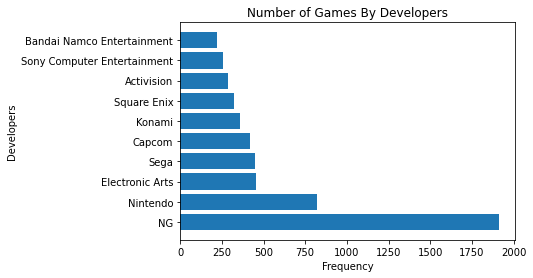

In [21]:
plt.barh(list(sort_dict.keys())[0:10], list(sort_dict.values())[0:10]);
plt.title('Number of Games By Developers');
plt.xlabel('Frequency');
plt.ylabel('Developers');

3.8373517528997785

In [ ]:
plt.figure(figsize= (10,10))
plt.barh(list(sort_genres.keys()), list(sort_genres.values()));
plt.title('Most Common Genres');
plt.ylabel('Genres');
plt.xlabel('Frequency');

In [ ]:
df[(df.Developers == '[]') & (df.Rating == -1)]

In [ ]:
# pip install langdetect

In [ ]:
from langdetect import detect
detect("War doesn't show who's right, just who's left.")